In [94]:
from IPython.display import display
from ipywidgets import FileUpload

upload = FileUpload()
display(upload)

FileUpload(value=(), description='Upload')

In [95]:
import os

for uploaded_file in upload.value:
    filename = uploaded_file.name
    content = uploaded_file.content

    with open(os.path.join('/kaggle/working/', filename), 'wb') as f:
        f.write(content)

print("File saved to /kaggle/working/")

File saved to /kaggle/working/


In [96]:
import cv2 as cv
import numpy as np

In [97]:
img=cv.imread('/kaggle/working/Image.jpg',cv.IMREAD_GRAYSCALE)
img_float=np.float32(img)

In [98]:
img_float

array([[  9.,   9.,   9., ..., 152., 152., 153.],
       [  9.,   9.,   9., ..., 160., 160., 160.],
       [  9.,   9.,   9., ..., 134., 134., 135.],
       ...,
       [ 17.,  14.,  11., ..., 176., 169., 160.],
       [ 18.,  15.,  11., ..., 192., 183., 173.],
       [ 19.,  16.,  12., ..., 185., 176., 166.]], dtype=float32)

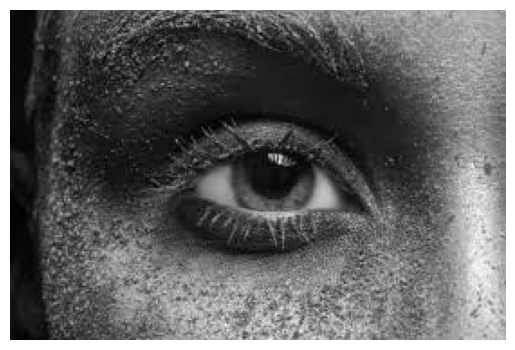

In [99]:
import matplotlib.pyplot as plt

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.savefig('Orignal_image.png')
plt.show()

In [100]:
dft=cv.dft(img_float,flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift=np.fft.fftshift(dft)

In [101]:
rows,cols=img.shape

mask=np.zeros((rows,cols,2),np.uint8)
radius=100

for i in range(rows):
    for j in range(cols):
        if np.sqrt((i-(rows//2))**2 + (j-(cols//2))**2) <= radius:
            mask[i,j]=1

In [102]:
x=np.arange(cols)
y=np.arange(rows)

x, y = np.meshgrid(x, y)

sigma=50
gaussian=np.exp(-((x - (cols//2))**2 + (y - (rows//2))**2) / (2 * sigma**2))
mask=np.dstack((gaussian,gaussian))

In [103]:
filtered_dft=dft_shift*mask

In [104]:
f_ishift=np.fft.ifftshift(filtered_dft)

img_back=cv.idft(f_ishift)

img_back=cv.magnitude(img_back[:,:,0],img_back[:,:,1])

In [105]:
img_back=cv.normalize(img_back,None,0,255,cv.NORM_MINMAX)
img_back=np.uint8(img_back)

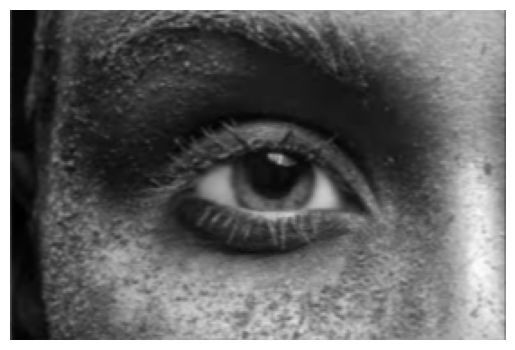

In [106]:
plt.imshow(img_back,cmap='grey')
plt.axis('off')
plt.savefig('Bluring_frequency_domain.png')
plt.show()